# **Visualización Notas de Estudiantes entre 2014-2024**
---

Utilizando datos de ingreso y matrícula del DEMRE se realizan 2 visualizaciones que permiten analizar el estado en estos últimos 10 años de la distribución socioecónomoica de los estudiantes. El primer gráfico muestra la distribución de establecimiento de origen de los estudiantes para cada universidad desde el 2014 al 2024. El segundo gráfico muestra la evolución ed las notas promedio de ingreso a cada universidad a lo largo del tiempo.

El objetivo de este análisis es entregar una visualización que permita identificar patrones comunes en la universidades a lo largo del tiempo.

In [1]:
import pandas as pd
import numpy as np
import io
import os
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import PercentFormatter, MultipleLocator
from matplotlib.patches import ArrowStyle, FancyArrowPatch
import matplotlib.font_manager as fm
from matplotlib import lines
import matplotlib.patches as patches
import mpltern
import ternary

import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

### Carga y Procesamiento de Datos

In [2]:
# Carga de Data
def read_list_csv(carpeta, formato='.csv'):
    list_files = []
    for item in carpeta.rglob('*'):
        if item.is_file():
            if str(item).endswith(formato):
                list_files += ['.\\' + str(item)]

    return list_files

ruta_admision = Path('./datos_ext/admision')
#ruta_inscripcion = Path('./datos_ext/inscripcion')
ruta_matricula = Path('./datos_ext/matricula')
#ruta_postulacion = Path('./datos_ext/postulacion')

list_files_admision = read_list_csv(ruta_admision)
#list_files_inscripcion = read_list_csv(ruta_inscripcion)
list_files_matricula = read_list_csv(ruta_matricula)
#list_files_postulacion = read_list_csv(ruta_postulacion)

list_files_admision_xlsx = read_list_csv(ruta_admision, formato='.xlsx')
#list_files_inscripcion_xlsx = read_list_csv(ruta_inscripcion, formato='.xlsx')
list_files_matricula_xlsx = read_list_csv(ruta_matricula, formato='.xlsx')
#list_files_postulacion_xlsx = read_list_csv(ruta_postulacion, formato='.xlsx')

In [3]:
# Definicion de columnas
list_admision_2014_2024 = list_files_admision[10:-1]
cols_admision_2014_2024 = [
    ['ID_aux', 'PROM_NOTAS', 'PTJE_NEM', 'PTJE_RANKING', 'GRUPO_DEPENDENCIA'],
    ['ID_aux', 'PROM_NOTAS', 'PTJE_NEM', 'PTJE_RANKING', 'GRUPO_DEPENDENCIA'],
    ['ID_aux', 'PROM_NOTAS', 'PTJE_NEM', 'PTJE_RANKING', 'GRUPO_DEPENDENCIA'],
    ['ID_aux', 'PROM_NOTAS', 'PTJE_NEM', 'PTJE_RANKING', 'GRUPO_DEPENDENCIA'],
    ['ID_aux', 'PROMEDIO_NOTAS', 'PTJE_NEM', 'PTJE_RANKING', 'GRUPO_DEPENDENCIA'],
    ['ID_aux', 'PROMEDIO_NOTAS', 'PTJE_NEM', 'PTJE_RANKING', 'GRUPO_DEPENDENCIA'],
    ['ID_aux', 'PROMEDIO_NOTAS', 'PTJE_NEM', 'PTJE_RANKING', 'GRUPO_DEPENDENCIA'],
    ['ID_aux', 'PROMEDIO_NOTAS', 'PTJE_NEM', 'PTJE_RANKING', 'GRUPO_DEPENDENCIA'],
    ['ID_aux', 'PROMEDIO_NOTAS', 'PTJE_NEM', 'PTJE_RANKING', 'GRUPO_DEPENDENCIA'],
    ['ID_aux', 'PROMEDIO_NOTAS', 'PTJE_NEM', 'PTJE_RANKING', 'GRUPO_DEPENDENCIA'],
    ['ID_aux', 'PROMEDIO_NOTAS', 'PTJE_NEM', 'PTJE_RANKING', 'GRUPO_DEPENDENCIA']  
]

list_files_matricula_2014_2024 = list_files_matricula[9:]
cols_matricula_2014_2024 = [
    ['ID_aux', 'CODIGO_UNIV', 'CODIGO', 'PTJE_POND'],  
    ['ID_aux', 'CODIGO_UNIV', 'CODIGO', 'PTJE_POND'],  
    ['ID_aux', 'CODIGO_UNIV', 'CODIGO', 'PTJE_POND'],  
    ['ID_aux', 'CODIGO_UNIV', 'CODIGO', 'PTJE_POND'],  
    ['ID_aux', 'CODIGO_UNIV', 'CODIGO', 'PTJE_POND'],  
    ['ID_aux', 'CODIGO_UNIV', 'CODIGO', 'PTJE_POND'],  
    ['ID_aux', 'CODIGO_UNIV', 'CODIGO', 'PTJE_POND'],  
    ['ID_aux', 'CODIGO_UNIV', 'CODIGO', 'PTJE_POND'],  
    ['ID_aux', 'CODIGO_UNIV', 'CODIGO', 'PTJE_POND'],  
    ['ID_aux', 'CODIGO_UNIV', 'CODIGO', 'PTJE_POND'],  
    ['ID_aux', 'CODIGO_UNIV', 'CODIGO', 'PTJE_POND'],  
    ['ID_aux', 'CODIGO_UNIV', 'CODIGO', 'PTJE_POND'],  
]

list_files_matricula_xlsx_2014_2024 = list_files_matricula_xlsx[9:]
list_sheet_matricula = [
    'Anexo - OfertaAcadémica_RegBEA',
    'Anexo - OfertaAcadémica_RegBEA',
    'Anexo - OfertaAcadémica_RegBEA',
    'Anexo - OfertaAcadémica_RegBEA',
    'Anexo - OfertaAcadémica_RegBEA',
    'Anexo - OfertaAcadémica_RegBEA',
    'Anexo - OfertaAcadémica_RegBEA',
    'Anexo - OfertaAcadémica_RegBEA',
    'Anexo - OfertaAcadémica_RegBEA',
    'Anexo - Oferta académica',
    'Anexo - Oferta académica'
]

cols_matricula_xlsx_2014_2024 = [
    ['CODIGO', 'UNIVERSIDAD'],
    ['CODIGO', 'UNIVERSIDAD'],
    ['CODIGO', 'UNIVERSIDAD'],
    ['CODIGO', 'UNIVERSIDAD'],
    ['CODIGO_CARRERA', 'NOMBRE_UNIVERSIDAD'],
    ['CODIGO_CARRERA', 'NOMBRE_UNIVERSIDAD'],
    ['CODIGO', 'UNIVERSIDAD'],
    ['CODIGO', 'UNIVERSIDAD'],
    ['CODIGO', 'UNIVERSIDAD'],
    ['CODIGO', 'UNIVERSIDAD'],
    ['CODIGO_CARRERA', 'NOMBRE_UNIVERSIDAD'],
]

#Procesamienhto
cols_admision = ['ID_aux', 'PROMEDIO_NOTAS', 'PTJE_NEM', 'PTJE_RANKING', 'GRUPO_DEPENDENCIA', 'AÑO']
cols_matricula = ['ID_aux', 'CODIGO_UNIV', 'CODIGO', 'PTJE_POND', 'AÑO', 'UNIVERSIDAD']
df_admision = pd.DataFrame(columns=cols_admision)
df_matricula = pd.DataFrame(columns=cols_matricula)
gdep_map = {1: 'Particular pagado', 2: 'Particular subvencionado', 3: 'Municipal', 4: 'Slep'}

for k in range(len(cols_admision_2014_2024)):
    print(2014+k)
    df = pd.read_csv(list_admision_2014_2024[k], sep=';', low_memory=False)[cols_admision_2014_2024[k]]
    df.columns = cols_admision[:-1]
    df['AÑO'] = 2014 + k
    df_admision = pd.concat([df_admision, df])

    df = pd.read_csv(list_files_matricula_2014_2024[k], sep=';', low_memory=False)[cols_matricula_2014_2024[k]]
    df.columns = cols_matricula[:-2]
    df['AÑO'] = 2014 + k

    df_aux = pd.read_excel(list_files_matricula_xlsx_2014_2024[k], sheet_name=list_sheet_matricula[k])[cols_matricula_xlsx_2014_2024[k]]
    df_aux.columns = ['CODIGO', 'UNIVERSIDAD']
    universidad_map = {df_aux.drop_duplicates('CODIGO').iloc[i]['CODIGO']:df_aux.drop_duplicates('CODIGO').iloc[i]['UNIVERSIDAD']  for i in range(df_aux.drop_duplicates('CODIGO').shape[0])}
    df['UNIVERSIDAD'] = df['CODIGO'].map(universidad_map)
    df = df.dropna()

    df_matricula = pd.concat([df_matricula, df])

df_admision_matricula = df_matricula.merge(df_admision, how='left', on=['ID_aux', 'AÑO'])
#Filtro establecimientos municipal, particular pagado y particular subvencionado
df_admision_matricula = df_admision_matricula[~df_admision_matricula['GRUPO_DEPENDENCIA'].isna()]
df_admision_matricula = df_admision_matricula[df_admision_matricula['GRUPO_DEPENDENCIA']>0]
df_admision_matricula = df_admision_matricula[df_admision_matricula['GRUPO_DEPENDENCIA']<5] #Incluye Slep como municipal

df_admision_matricula['GRUPO_DEPENDENCIA'] = df_admision_matricula['GRUPO_DEPENDENCIA'].astype(int)
df_admision_matricula['GRUPO_DEPENDENCIA'] = df_admision_matricula['GRUPO_DEPENDENCIA'].map(gdep_map)
df_admision_matricula['Particular pagado'] = (df_admision_matricula['GRUPO_DEPENDENCIA']=='Particular pagado')*1
df_admision_matricula['Municipal'] = (df_admision_matricula['GRUPO_DEPENDENCIA']=='Municipal')*1
df_admision_matricula['Slep'] = (df_admision_matricula['GRUPO_DEPENDENCIA']=='Slep')*1
df_admision_matricula['Municipal'] = df_admision_matricula['Municipal'] + df_admision_matricula['Slep']
df_admision_matricula['Particular subvencionado'] = (df_admision_matricula['GRUPO_DEPENDENCIA']=='Particular subvencionado')*1
df_admision_matricula['PTJE_POND'] = df_admision_matricula['PTJE_POND'].astype(str).str.replace(',', '.').astype(float)
df_admision_matricula['PROMEDIO_NOTAS'] = df_admision_matricula['PROMEDIO_NOTAS'].astype(str).str.replace(',', '.').astype(float)
df_admision_matricula['PTJE_NEM'] = df_admision_matricula['PTJE_NEM'].astype(str).str.replace(',', '.').astype(float)
df_admision_matricula['PTJE_RANKING'] = df_admision_matricula['PTJE_RANKING'].astype(str).str.replace(',', '.').astype(float)

df_admision_matricula['UNIVERSIDAD'] = df_admision_matricula['UNIVERSIDAD']\
    .apply(lambda x: 'UNIVERSIDAD ADOLFO IBAÑEZ' if x=='UNIVERSIDAD ADOLFO IBAÃ‘EZ' else x)\
    .apply(lambda x: 'UNIVERSIDAD DE LAS AMERICAS' if x=='UNIVERSIDAD DE LAS AMÃ‰RICAS' else x)

df_admision_matricula['PROMEDIO_NOTAS'] = df_admision_matricula['PROMEDIO_NOTAS'].apply(lambda x: x/100 if x>100 else x)
df_admision_matricula = df_admision_matricula[df_admision_matricula['PROMEDIO_NOTAS']>0]

2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024


### Definición de Colores y Fuentes.

Se utilizan 2 mapas de color, uno para cada figura. Escalas de grises y fuentes compartidas.

In [4]:
# Colores
############################################################################################

# Colores Figura 1
col_yellow = (224,177,101,255)
col_green = (0,150,158,255)
col_salmon = (221,109,109,255)
col_wine = (155,97,128,255)
col_black = (3,2,8,255)
col_white = (225,232,234,255)
col_gray_text = (58,84,95,255)
col_gray = (170,190,199,255)
col_gray_dark = (108,135,147,255)

colorGen_1 = tuple([i/255 for i in col_wine])
colorPP_1 = tuple([i/255 for i in col_salmon])
colorMun_1 = tuple([i/255 for i in col_yellow])
colorPS_1 = tuple([i/255 for i in col_green])

colorBlack = tuple([i/255 for i in col_black])
colorWhite= tuple([i/255 for i in col_white])
colorGrayText = tuple([i/255 for i in col_gray_text])
colorGray = tuple([i/255 for i in col_gray])
colorGrayDark = tuple([i/255 for i in col_gray_dark])

# Colores Figura 2
my_gradient = LinearSegmentedColormap.from_list('my_gradient', (
    # Edit this gradient at https://eltos.github.io/gradient/#0:001A47-33.3:004C70-66.6:DDDD00-100:990000
    (0.000, (0.000, 0.102, 0.278)),
    (0.333, (0.000, 0.298, 0.439)),
    (0.666, (0.867, 0.867, 0.000)),
    (1.000, (0.600, 0.000, 0.000))))

my_gradient.set_bad('#B5B4A6')

def mod_color_op(color, intensidad=1., alpha=1.):
    return (color[0] * intensidad, color[1] * intensidad, color[2] * intensidad, alpha)

def rgba_to_hex(rgba):
    r, g, b, a = rgba  # Extraemos los valores de RGBA
    return '#{:02x}{:02x}{:02x}{:02x}'.format(int(r * 255), int(g * 255), int(b * 255), int(a * 255))

gradient_blue = mod_color_op(my_gradient(0.27), intensidad=1., alpha=1.)
gradient_yellow = mod_color_op(my_gradient(0.73), intensidad=1., alpha=1.)
gradient_green = mod_color_op(my_gradient(0.6), intensidad=1., alpha=1.)
gradient_red = mod_color_op(my_gradient(0.99), intensidad=1., alpha=1.)

# Fuentes
############################################################################################
font_path_latoBlack = 'Lato/Lato-Black.ttf' 
font_path_latoB = 'Lato/Lato-Bold.ttf' 
font_path_latoR = 'Lato/Lato-Regular.ttf'
font_path_latoI = 'Lato/Lato-Italic.ttf'
font_path_noto2 = 'Noto_Sans_Symbols_2/NotoSansSymbols2-Regular.ttf'

prop_latoBlack = fm.FontProperties(fname=font_path_latoBlack)
prop_latoB = fm.FontProperties(fname=font_path_latoB)
prop_latoR = fm.FontProperties(fname=font_path_latoR)
prop_latoI = fm.FontProperties(fname=font_path_latoI)
prop_noto2 = fm.FontProperties(fname=font_path_noto2)

### Funciones

In [ ]:
# Funciones compartidas
def title_fig(fig, ax, posx_line_title, posy_line_title, color_text, color_line, text,
            lw_line_title, pos_x0_title, pos_y0_title, fontsize=14, fontproperties=prop_latoBlack, linespacing=1):
    fig.add_artist(
        lines.Line2D(posx_line_title, posy_line_title, lw=lw_line_title, 
                    color=color_line, solid_capstyle="butt", 
                    transform=ax.transAxes))
    fig.text(pos_x0_title, pos_y0_title, text,
            ha='left', va='top', fontsize=fontsize, weight=700, 
            color=color_text, fontproperties=fontproperties, linespacing=linespacing)

# Figura 1
############################################################################################
def for_uni_scatter(df_admision_matricula_group, tax, uni, color, edgecolor='w', alpha=1.0):
    for k in range(len(uni)):
        data = df_admision_matricula_group[df_admision_matricula_group['UNIVERSIDAD']==uni[k]][['Municipal', 'Particular pagado', 'Particular subvencionado']]
        data_size = df_admision_matricula_group[df_admision_matricula_group['UNIVERSIDAD']==uni[k]]['PROMEDIO_NOTAS']-4
        tax.scatter(data['Particular pagado'], data['Particular subvencionado'], data['Municipal'], color=color, s=np.exp(data_size*2.2), edgecolor=edgecolor, alpha=alpha)

def barh_grupo_dep(fig, df, uni, pos=[0.6, 0.85, 0.1, 0.01], pos_text=[[0,0,0],[0,0,0]], 
                   text_title=None, pos_title=[0,0], ha_title='center', va_title='center', 
                   color=[colorPP_1, colorMun_1, colorPS_1], stext=10):
    df = df[df['UNIVERSIDAD'].isin(uni)].drop(columns='UNIVERSIDAD')
    df['AÑO'] = df['AÑO'].astype(int)
    df = df.set_index('AÑO')
    df = pd.DataFrame(df.mean()).T

    if text_title==None:
        text_title=uni[0]
        text_title = text_title.title()

    df_pp = int(np.round(df['Particular pagado'] * 100))
    df_ps = int(np.round(df['Particular subvencionado'] * 100))
    df_m = 100 - df_pp - df_ps

    bar_ax = fig.add_axes(pos)
    bar_ax.barh(df.index, df['Particular pagado'], label='Particular pagado', color=color[0])
    bar_ax.text(df['Particular pagado'].values[0]*0.5 + pos_text[0][0], pos_text[1][0], 
                f"{df_pp}%",
                ha='center', va='bottom', fontsize=stext, color=colorGrayText, fontproperties=prop_latoR)
    bar_ax.barh(df.index, df['Municipal'], left=df['Particular pagado'] ,label='Municipal', color=color[1])
    bar_ax.text(df['Municipal'].values[0]*0.5 + df['Particular pagado'].values[0] + pos_text[0][1], pos_text[1][1], 
                f"{df_m}%", 
                ha='center', va='top', fontsize=stext, color=colorGrayText, fontproperties=prop_latoR)
    bar_ax.barh(df.index, df['Particular subvencionado'], left=df['Particular pagado']+df['Municipal'],label='Particular subvencionado', color=color[2])
    bar_ax.text(df['Particular subvencionado'].values[0]*0.5 + df['Particular pagado'].values[0] + df['Municipal'].values[0] + pos_text[0][2], pos_text[1][2], 
            f"{df_ps}%", 
            ha='center', va='bottom', fontsize=stext, color=colorGrayText, fontproperties=prop_latoR)
    
    bar_ax.text(0.5+pos_title[0], 1.8+pos_title[1], text_title, ha=ha_title, va=va_title, fontsize=stext,
                color=colorGrayText, fontproperties=prop_latoR)
    bar_ax.set_axis_off()

def drawCircle(fig, pos=[0.6, 0.85, 0.1, 0.01], color='k', alpha=0.9, fc='#ffffff', alpha_fc=0., r=1.0):
    theta = np.linspace(0, 2 * np.pi, 100)
    x = np.cos(theta) * r
    y = np.sin(theta) * r
    circle_ax = fig.add_axes(pos)
    circle_ax.plot(x, y, color=color, alpha=alpha)
    circle_ax.fill(x, y, color=fc, alpha=alpha_fc)
    circle_ax.set_xlim(-1.5, 1.5)
    circle_ax.set_ylim(-1.5, 1.5)
    circle_ax.set_aspect('equal', adjustable='box')
    circle_ax.set_axis_off()

def drawCircleText(fig, pos=[0.6, 0.85, 0.1, 0.1], color='k', alpha=0.9, fc='#ffffff', alpha_fc=0., r=1.0,
                   text_title='', ha_title='center', va_title='center', stext=8, pos_text=(0,0)):
    theta = np.linspace(0, 2 * np.pi, 100)
    x = np.cos(theta) * r
    y = np.sin(theta) * r
    circle_ax = fig.add_axes(pos)
    circle_ax.plot(x, y, color=color, alpha=alpha, linewidth=0.8)
    circle_ax.fill(x, y, color=fc, alpha=alpha_fc)
    circle_ax.set_xlim(-1.5, 1.5)
    circle_ax.set_ylim(-1.5, 1.5)
    circle_ax.text(pos_text[0], pos_text[1], text_title, ha=ha_title, va=va_title,
                   fontsize=stext, color=colorGrayText, fontproperties=prop_latoR)
    circle_ax.set_aspect('equal', adjustable='box')
    circle_ax.set_axis_off()

def drawLine(fig, pos=[0.6, 0.85, 0.5, 0.5], points=[[0,0], [10,10]], color='k', alpha=0.9, margin=0.1, point_size=10):
    line_ax = fig.add_axes(pos)
    line_ax.plot(points[0], points[1], color=color, alpha=alpha)
    line_ax.scatter(points[0][-1], points[1][-1], color=color, alpha=alpha, s=point_size)

    line_ax.set_xlim(np.min(points[0])-margin, np.max(points[0])+margin)
    line_ax.set_ylim(np.min(points[1])-margin, np.max(points[1])+margin)
    line_ax.set_axis_off()

def axis_label_arrow(tax, msje, angle=-60, pos_text='left',
                     ta = np.array([0.96, 0.02,  0.04]), tb = np.array([1.0, 0.02,  0.0]),
                     pos_arrow=(-0.045, 0.,0.045), color=colorPP_1):

    arrowstyle = ArrowStyle('simple', head_length=10, head_width=5)
    kwargs_arrow = {'transform': tax.transAxes, 'arrowstyle': arrowstyle, 'linewidth': 1, 'clip_on': False, 'zorder': -10}

    f = tax.transAxesProjection.transform
    tarrow = FancyArrowPatch(f(ta), f(tb), ec=color, fc=color, **kwargs_arrow)
    tax.add_patch(tarrow)
    kwargs_label = {'transform': tax.transTernaryAxes, 'backgroundcolor': '#FFFFFF00', 'size':9, 'fontweight':'bold',
                    'ha': pos_text, 'va': 'center', 'rotation_mode': 'anchor', 'zorder': -9, 'fontproperties': prop_latoBlack}
    tpos = tb + pos_arrow
    tax.text(*tpos, msje, color=color, rotation=angle, **kwargs_label)

def draw_fig1_colors(fig, ax, df, colorGen_1, colorPP_1, colorMun_1, colorPS_1, colorBlack, colorGrayText, colorGray):
    # Procesamiento
    df_admision_matricula_group = df.groupby(['AÑO', 'UNIVERSIDAD'], as_index=False)[['Particular pagado', 'Municipal', 'Particular subvencionado','PROMEDIO_NOTAS']].mean().sort_values(['UNIVERSIDAD', 'AÑO'])
    df_admision_matricula_group_all = df.groupby(['AÑO'], as_index=False)[['Particular pagado', 'Municipal', 'Particular subvencionado','PROMEDIO_NOTAS']].mean().sort_values(['AÑO'])
    df_admision_matricula_group_all['UNIVERSIDAD'] = 'ALL'

    # Reorganizar para que la universidad quede dentro del año
    nested_structure = (
       df_admision_matricula_group
       .set_index(['AÑO', 'UNIVERSIDAD'])  # Configura los índices jerárquicos
       .groupby(level=0)                  # Agrupa por el nivel de AÑO
       .apply(lambda group: group.droplevel(0).to_dict(orient='index'))  # Convierte subniveles en dicts
       .to_dict()
       )

    # Guardar el JSON resultante con la nueva estructura
    #import json
    #with open('df_admision_matricula_group.json', 'w', encoding='utf-8') as f:
    #    json.dump(nested_structure, f, indent=2, ensure_ascii=False)

    uni_top = ['PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE', 'UNIVERSIDAD DE CHILE', 'UNIVERSIDAD DE CONCEPCION', 'UNIVERSIDAD ADOLFO IBAÑEZ', 'UNIVERSIDAD DE SANTIAGO DE CHILE']
    df_admision_matricula_group_all_top = df[df['UNIVERSIDAD'].isin(uni_top)].groupby(['AÑO'], as_index=False)[['Particular pagado', 'Municipal', 'Particular subvencionado','PROMEDIO_NOTAS']].mean().sort_values(['AÑO'])
    df_admision_matricula_group_all_top['UNIVERSIDAD'] = 'TOP'

    df_admision_mean_uni = df_admision_matricula_group.groupby('UNIVERSIDAD').mean()
    df_admision_mean_uni.columns = df_admision_mean_uni.columns.str.replace(' ', '_')
    unis_municipal = df_admision_mean_uni.query('Municipal >= 0.5').index.tolist()
    unis_pp = df_admision_mean_uni.query('Particular_pagado >= 0.5').index.tolist()
    unis_ps = df_admision_mean_uni.query('Particular_subvencionado >= 0.5').index.tolist()
    unis_all = df_admision_mean_uni[~df_admision_mean_uni.index.isin(unis_municipal + unis_pp + unis_ps)].index.tolist()


    # Subplot ternario
    tax = fig.add_subplot(111, projection='ternary', ternary_sum=100.0)

    # Ajuste parametros eje ternario
    tax.spines[:].set_visible(False)
    tax.spines[:].set_color(colorGrayText)
    tax.tick_params(axis='t', colors=colorPP_1, labelsize=8)
    tax.tick_params(axis='r', colors=colorMun_1, labelsize=8)
    tax.tick_params(axis='l', colors=colorPS_1, labelsize=8)

    axis_label_arrow(tax, 'Particular pagado', angle=-60, pos_text='left',
                    ta = np.array([0.96, 0.02, 0.04]), tb = np.array([1.0, 0.02, 0.0]), pos_arrow=(-0.045, 0., 0.045), color=colorPP_1)
    axis_label_arrow(tax, 'Municipal', angle=0, pos_text='right',
                    ta = np.array([0.02, 0.04, 0.96]), tb = np.array([0.02, 0.00, 1.0]), pos_arrow=(0.0, 0.045, -0.0), color=colorMun_1)
    axis_label_arrow(tax, 'Particular subvencionado', angle=60, pos_text='left',
                    ta = np.array([0.04, 0.96, 0.02]), tb = np.array([0.00, 1.0, 0.02]), pos_arrow=(0.045, -0.045, 0.0), color=colorPS_1)

    tax.axtspan(50.0, 100.0, alpha=0.2, fc=rgba_to_hex(colorPP_1))
    tax.axlspan(50.0, 100.0, alpha=0.2, fc=rgba_to_hex(colorPS_1))
    tax.axrspan(50.0, 100.0, alpha=0.2, fc=rgba_to_hex(colorMun_1))

    tax.taxis.set_major_formatter(PercentFormatter())
    tax.laxis.set_major_formatter(PercentFormatter())
    tax.raxis.set_major_formatter(PercentFormatter())

    tax.taxis.set_major_locator(MultipleLocator(25))
    tax.laxis.set_major_locator(MultipleLocator(25))
    tax.raxis.set_major_locator(MultipleLocator(25))

    # Filtro colores universidades
    df_admision_mean_uni = df_admision_matricula_group.groupby('UNIVERSIDAD').mean()
    df_admision_mean_uni.columns = df_admision_mean_uni.columns.str.replace(' ', '_')
    unis_municipal = df_admision_mean_uni.query('Municipal >= 0.5').index.tolist()
    unis_pp = df_admision_mean_uni.query('Particular_pagado >= 0.5').index.tolist()
    unis_ps = df_admision_mean_uni.query('Particular_subvencionado >= 0.5').index.tolist()
    unis_all = df_admision_mean_uni[~df_admision_mean_uni.index.isin(unis_municipal + unis_pp + unis_ps)].index.tolist()

    # Universidades top chile de acuerdo a QS World University Rankings
    uni_top = ['PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE', 'UNIVERSIDAD DE CHILE', 'UNIVERSIDAD DE CONCEPCION', 'UNIVERSIDAD ADOLFO IBAÑEZ']
    unis_pp_top = list(set(uni_top) & set(unis_pp))
    unis_ps_top = list(set(uni_top) & set(unis_ps))
    unis_all_top = list(set(uni_top) & set(unis_all))

    for_uni_scatter(df_admision_matricula_group, tax, unis_municipal, rgba_to_hex(colorMun_1), alpha=0.25)
    for_uni_scatter(df_admision_matricula_group, tax, unis_pp, rgba_to_hex(colorPP_1), alpha=0.25)
    for_uni_scatter(df_admision_matricula_group, tax, unis_ps, rgba_to_hex(colorPS_1), alpha=0.25)
    for_uni_scatter(df_admision_matricula_group, tax, unis_all, rgba_to_hex(colorGen_1), alpha=0.25)

    for_uni_scatter(df_admision_matricula_group, tax, unis_pp_top, rgba_to_hex(colorPP_1), edgecolor=mod_color_op(colorPP_1, intensidad=0.6))
    for_uni_scatter(df_admision_matricula_group, tax, unis_ps_top, rgba_to_hex(colorPS_1), edgecolor=mod_color_op(colorPS_1, intensidad=0.6))
    for_uni_scatter(df_admision_matricula_group, tax, unis_all_top, rgba_to_hex(colorGen_1), edgecolor=mod_color_op(colorGen_1, intensidad=0.6))

    for_uni_scatter(df_admision_matricula_group, tax, ['UNIVERSIDAD DE SANTIAGO DE CHILE'], mod_color_op(colorPS_1, intensidad=0.8), edgecolor=mod_color_op(colorPS_1, intensidad=0.6)) # aparte para ajustar color

    # Universidades Top - Grupo heterogeneo
    barh_grupo_dep(fig, df_admision_matricula_group, ['UNIVERSIDAD DE CHILE'], 
                pos=[0.534, 0.481, 0.1, 0.02], pos_text=[[0,0.03,0.05],[0.6,-0.7,0.6]],
                text_title='Universidad de Chile', pos_title=[0,0], ha_title='center', va_title='center', 
                color=[colorPP_1, colorMun_1, colorPS_1], stext=8)
    drawCircle(fig, pos=[0.393, 0.315, 0.11, 0.11], color=colorGrayText, alpha=0.9)
    drawLine(fig, pos=[0.467, 0.378, 0.06, 0.13], points=[[0,20], [5,10]],color=colorGrayText, alpha=0.9, margin=0.9, point_size=10)

    # Universidades Top - mayor ingreso colegio particular pagado
    barh_grupo_dep(fig, df_admision_matricula_group, ['PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE'], 
                pos=[0.252, 0.614, 0.1, 0.02], pos_text=[[0,0.03,0.05],[0.6,-0.7,0.6]],
                text_title='Pontificia Universidad\nCatólica de Chile', pos_title=[0,0.3], ha_title='center', va_title='center', 
                color=[colorPP_1, colorMun_1, colorPS_1], stext=8)
    drawCircle(fig, pos=[0.4, 0.518, 0.12, 0.12], color=colorGrayText, alpha=0.9)
    drawLine(fig, pos=[0.353, 0.583, 0.08, 0.05], points=[[20,0], [5,8]],color=colorGrayText, alpha=0.9, margin=0.9, point_size=10)

    barh_grupo_dep(fig, df_admision_matricula_group, ['UNIVERSIDAD ADOLFO IBAÑEZ'], 
                pos=[0.272, 0.784, 0.1, 0.02], pos_text=[[0,0.03,0.05],[0.6,-0.7,0.6]],
                text_title='Universidad\nAdolfo Ibañez', pos_title=[0,0.3], ha_title='center', va_title='center', 
                color=[colorPP_1, colorMun_1, colorPS_1], stext=8)
    drawCircle(fig, pos=[0.41, 0.683, 0.122, 0.122], color=colorGrayText, alpha=0.9)
    drawLine(fig, pos=[0.373, 0.753, 0.07, 0.05], points=[[20,0], [5,8]],color=colorGrayText, alpha=0.9, margin=0.9, point_size=10)

    # Universidades Top - mayor ingreso colegio particular subvemcionado
    barh_grupo_dep(fig, df_admision_matricula_group, ['UNIVERSIDAD DE CONCEPCION'], 
                pos=[0.507, 0.284, 0.1, 0.02], pos_text=[[0,0.03,0.05],[0.6,-0.7,0.6]],
                text_title='Universidad de\nConcepción', pos_title=[0,0.3], ha_title='center', va_title='center', 
                color=[colorPP_1, colorMun_1, colorPS_1], stext=8)
    drawCircle(fig, pos=[0.369, 0.148, 0.1, 0.1], color=colorGrayText, alpha=0.9)
    drawLine(fig, pos=[0.441, 0.198, 0.06, 0.11], points=[[0,20], [5,10]],color=colorGrayText, alpha=0.9, margin=0.9, point_size=10)

    barh_grupo_dep(fig, df_admision_matricula_group, ['UNIVERSIDAD DE SANTIAGO DE CHILE'], 
                pos=[0.617, 0.16, 0.1, 0.02], pos_text=[[0,0.03,0.05],[0.6,-0.7,0.6]],
                text_title='Universidad de\nSantiago de Chile', pos_title=[0,0.3], ha_title='center', va_title='center', 
                color=[colorPP_1, colorMun_1, colorPS_1], stext=8)
    drawCircle(fig, pos=[0.345, 0.135, 0.1, 0.1], color=mod_color_op(colorGrayText, intensidad=1.3), alpha=0.9)
    drawLine(fig, pos=[0.415, 0.12, 0.2, 0.11], points=[[0,20], [5,4.9]],color=mod_color_op(colorGrayText, intensidad=1.3), alpha=0.9, margin=0.9, point_size=10)

    # Anotacion general
    fig.text(0.94, 0.9, "Distribución promedio de instituciones\nde origen de estudiantes matriculados\nentre 2014 y 2024", ha='left', va='center', fontsize=10, weight=700, 
            color=colorGrayText, fontproperties=prop_latoR)

    y_=-0.08
    barh_grupo_dep(fig, df_admision_matricula_group_all, ['ALL'], 
                pos=[1.02+y_, 0.81, 0.25, 0.02], pos_text=[[0,0.0,0.0],[0.6,1.15,0.6]], ha_title='left', va_title='center', 
                text_title='Todas las Universidades', pos_title=[-0.5,-2.8],
                color=[colorPP_1, colorMun_1, colorPS_1], stext=8)

    barh_grupo_dep(fig, df_admision_matricula_group_all_top, ['TOP'], 
                pos=[1.02+y_, 0.73, 0.25, 0.02], pos_text=[[0,0.0,0.0],[0.6,1.15,0.6]], ha_title='left', va_title='center', 
                text_title='Universidades Top de Chile $^{**}$', pos_title=[-0.5,-2.8],
                color=[colorPP_1, colorMun_1, colorPS_1], stext=8)

    ax.text(0.03, 0.445, 
            'En la mayoría de las\nUniversidades los\nestudiantes provienen\nmayoritariamente de\nestablecimientos\nparticulares\nsubvencionados', 
            ha='left', va='center', fontsize=8, color=colorGrayText, linespacing=1.5)
    drawLine(fig, pos=[0.25, 0.383, 0.08, 0.05], points=[[0,20], [8,3]],color=colorGrayText, alpha=0.9, margin=0.9, point_size=10)

    ax.text(0.825, 0.43,
            'Solo en la Universidad\nde Los Lagos sus\nestudiantes provienen\nen su mayoría de\nestablecimientos\nmunicipales', 
            ha='left', va='center', fontsize=8, color=colorGrayText, linespacing=1.5)
    drawLine(fig, pos=[0.68, 0.4, 0.08, 0.05], points=[[20,0], [8,3]],color=colorGrayText, alpha=0.9, margin=0.9, point_size=10)

    ax.text(0.71, 0.71,
            'Los estudiantes de\nestablecimientos particulares\npagados están más concentrados\nen sólo cuatro universidades:'+
            '\n - Pontificia Universidad\n   Católica de Chile'+
            '\n - Universidad Adolfo Ibañez'+
            '\n - Universidad de Los Andes'+
            '\n - Universidad del Desarrollo',
            ha='left', va='center', fontsize=8, color=colorGrayText, linespacing=1.5)
    drawLine(fig, pos=[0.59, 0.58, 0.08, 0.05], points=[[20,0], [8,3]],color=colorGrayText, alpha=0.9, margin=0.9, point_size=10)

    # Simbologia
    x_=-0.08
    y_=-0.07
    drawCircleText(fig, pos=[1.05+x_, 0.48+y_, 0.1, 0.1], color=colorGray, alpha=0.9, fc=colorGray, alpha_fc=0.9, r=0.12,
                text_title='5.5', ha_title='center', va_title='center', stext=8, pos_text=(0,-1))
    drawCircleText(fig, pos=[1.05+0.04+x_, 0.48+y_, 0.1, 0.1], color=colorGray, alpha=0.9, fc=colorGray, alpha_fc=0.9, r=0.235,
                text_title='6.0', ha_title='center', va_title='center', stext=8, pos_text=(0,-1))
    drawCircleText(fig, pos=[1.05+0.0835+x_, 0.48+y_, 0.1, 0.1], color=colorGray, alpha=0.9, fc=colorGray, alpha_fc=0.9, r=0.35,
                text_title='6.5', ha_title='center', va_title='center', stext=8, pos_text=(0,-1))
    drawCircleText(fig, pos=[1.05+x_-0.038, 0.48-0.02+y_, 0.1, 0.1], color=colorGray, alpha=0., fc=colorGray, alpha_fc=0., r=0.235,
                text_title='Promedio de notas de enseñanza\nmedia de estudiantes por\nuniversidad y por año', ha_title='left', va_title='bottom', stext=8, pos_text=(0,1.8))

    drawCircleText(fig, pos=[0.9835+x_, 0.54-0.25, 0.1, 0.1], color=mod_color_op(colorPP_1, intensidad=0.6), alpha=0.9, fc=colorPP_1, alpha_fc=0.9, r=0.35,
                text_title='Universidades con mayoría de\nestudiantes de establecimientos\npart. pagados por año', ha_title='left', va_title='center', stext=8, pos_text=(1,0))
    drawCircleText(fig, pos=[0.9835+x_, 0.54-0.31, 0.1, 0.1], color=mod_color_op(colorPS_1, intensidad=0.6), alpha=0.9, fc=colorPS_1, alpha_fc=0.9, r=0.35,
                text_title='Universidades con mayoría de\nestudiantes de establecimientos\npart. subvencionados por año', ha_title='left', va_title='center', stext=8, pos_text=(1,0))
    drawCircleText(fig, pos=[0.9835+x_, 0.54-0.37, 0.1, 0.1], color=mod_color_op(colorMun_1, intensidad=0.6), alpha=0.9, fc=colorMun_1, alpha_fc=0.9, r=0.35,
                text_title='Universidades con mayoría de\nestudiantes de establecimientos\nmunicipales por año', ha_title='left', va_title='center', stext=8, pos_text=(1,0))
    drawCircleText(fig, pos=[0.9835+x_, 0.54-0.43, 0.1, 0.1], color=mod_color_op(colorGen_1, intensidad=0.6), alpha=0.9, fc=colorGen_1, alpha_fc=0.9, r=0.35,
                text_title='Universidades sin mayoría de\nestudiantes de cada grupo\nde establecimientos por año', ha_title='left', va_title='center', stext=8, pos_text=(1,0))
       
    # Titulo
    posx_line_title = [0.045-0.09, 1.4]
    posy_line_title = [1.23, 1.23]
    lw_line_title = 1
    pos_x0_title = 0.16-0.066
    pos_y0_title = 1.05
    title_fig(fig, ax, posx_line_title, posy_line_title, colorBlack, colorBlack,
            "Establecimientos particulares subvencionados aportan la mayor cantidad de estudiantes a las Universidades del Demre$^{*}$",
            lw_line_title, pos_x0_title, pos_y0_title)

    posx_line_title = [0.045-0.09, 0.045-0.09+0.03]
    posy_line_title = [1.2-.04, 1.2-.04]
    lw_line_title = 1
    pos_x0_title = 0.16-0.066
    pos_y0_title = 1.05-0.06
    title_fig(fig, ax, posx_line_title, posy_line_title, colorBlack, colorBlack,
            "Distribución de Universidades por tipo de establecimiento de origen",
            lw_line_title, pos_x0_title, pos_y0_title, fontsize=12)

    # pie de pagina
    posx_line_title = [0.045-0.09, 1.4]
    posy_line_title = [-0.1, -0.1]
    lw_line_title = 1
    pos_x0_title = 0.16-0.066
    pos_y0_title = 0.03
    title_fig(fig, ax, posx_line_title, posy_line_title, colorGrayText, colorGrayText,
            "$^{*}$       : Datos tomados de la página del Demre de Inscripción y Matrícula entre los años 2014 y 2024 (https://demre.cl/portales/portal-bases-datos).\n"+
            "$^{**}$    : Se considera el Top 5 de Universidades del QS World University Rankings 2024 (https://www.topuniversities.com/world-university-rankings/2024?countries=cl).\n"+
            "$^{***}$: Se consideran sólo los registros de estudiantes egresados de establecimientos municipales, particulares pagados o particulares subvencionados.",
            lw_line_title, pos_x0_title, pos_y0_title, fontsize=8, fontproperties=prop_latoI, linespacing=0.8)

    ax.set_axis_off()
    plt.show()


# Figura 2
############################################################################################
def draw_line_year(fig, df, pos=[0.5, 0.5, 0.2, 0.2], color_line_mean=gradient_red, color_rect=gradient_red, linewidth_text=[2015.5, 2020]):
    line_ax = fig.add_axes(pos)
    line_ax.plot(df.T.mean(1), color=color_line_mean, linewidth=1.2)
    
    rect = patches.Rectangle((2020, 5.8), width=3, height=6.3-5.8, linewidth=1, edgecolor=None, facecolor=color_rect, alpha=0.2)
    line_ax.add_patch(rect)

    line_ax.text(linewidth_text[0], 6.2, 'Periodo afectado\npor la pandemia', ha='left', va='bottom', color=color_rect, fontproperties=prop_latoR, fontsize=8)
    line_ax.hlines(6.2, linewidth_text[0], linewidth_text[1], linewidth=1, color=color_rect, alpha=0.4)

    line_ax.spines["right"].set_visible(False)
    line_ax.spines["left"].set_visible(False)
    line_ax.spines["top"].set_visible(False)
    line_ax.spines["bottom"].set_color(colorGrayText)

    line_ax.set_xticks(df.columns)
    line_ax.set_xticklabels([2014,15,16,17,18,19,20,21,22,23,24], color=colorGrayText, fontproperties=prop_latoR, fontsize=8)

    line_ax.set_yticks([5.8, 5.9, 6.0, 6.1, 6.2, 6.3])
    line_ax.set_yticklabels([5.8, 5.9, 6.0, 6.1, 6.2, 6.3], color=colorGrayText, fontproperties=prop_latoR, fontsize=8)
    line_ax.yaxis.tick_right()
    line_ax.tick_params(axis='y', length=7, width=0.5, color=colorGrayText)
    line_ax.tick_params(axis='x', width=0.5, color=colorGrayText)
    for tick in line_ax.get_yticklabels():
        tick.set_horizontalalignment('right')
        tick.set_verticalalignment('bottom')

    line_ax.set_ylim(5.75, 6.3)
    line_ax.set_title('Evolución de promedio de notas\nde enseñanza media', ha='left', color=colorGrayText, x=0, y=1.1, fontproperties=prop_latoR, fontsize=9)

def draw_symb(fig, pos=[0.25, 0.5, 0.3, 0.4], line_size=30, arrow_y=-0.007):
    point_ax = fig.add_axes(pos)
    
    point_ax.scatter(0,0, color=gradient_green, s=line_size*50/30)
    point_ax.scatter([0.1, 0.2],[0, 0], color=gradient_blue, alpha=0.2, s=line_size*30/30)
    point_ax.scatter(0.3,0, color=gradient_blue, s=line_size*50/30)
    point_ax.scatter([0.4, 0.5],[0, 0], color=gradient_red, alpha=0.2, s=line_size*30/30)
    point_ax.scatter(0.6,0, color=gradient_red, s=line_size*50/30)

    point_ax.text(0, 0.005, '2014', ha='center', va='bottom', color=colorGrayText, fontproperties=prop_latoR, fontsize=8)
    point_ax.text(0.3, 0.005, '2020', ha='center', va='bottom', color=colorGrayText, fontproperties=prop_latoR, fontsize=8)
    point_ax.text(0.6, 0.005, '2024', ha='center', va='bottom', color=colorGrayText, fontproperties=prop_latoR, fontsize=8)

    point_ax.annotate('', xy=(0.25, arrow_y), xytext=(0.05, arrow_y),
                arrowprops=dict(facecolor=gradient_blue, edgecolor=gradient_blue, width=1, headwidth=5, headlength=7.5, alpha=0.7))
    point_ax.annotate('', xy=(0.55, arrow_y), xytext=(0.35, arrow_y),
                arrowprops=dict(facecolor=gradient_red, edgecolor=gradient_red, width=1, headwidth=5, headlength=7.5, alpha=0.7))

    point_ax.text(0.15, -0.003+arrow_y, 'Evolución notas\n2014 - 2020', ha='center', va='top', color=colorGrayText, fontproperties=prop_latoR, fontsize=8)
    point_ax.text(0.45, -0.003+arrow_y, 'Evolución notas\n2020 - 2024', ha='center', va='top', color=colorGrayText, fontproperties=prop_latoR, fontsize=8)

    point_ax.set_axis_off()

def draw_fig2_colors(fig, ax, df, gradient_blue=gradient_blue, gradient_red=gradient_red, gradient_green=gradient_green, año_th=2020):
    # Procesamiento
    df_admision_matricula_adj_2 = df.copy()
    df_admision_matricula_adj_2['PROMEDIO_NOTAS_pp'] = df_admision_matricula_adj_2['PROMEDIO_NOTAS'] * df_admision_matricula_adj_2['Particular pagado']
    df_admision_matricula_adj_2['PROMEDIO_NOTAS_mun'] = df_admision_matricula_adj_2['PROMEDIO_NOTAS'] * df_admision_matricula_adj_2['Municipal']
    df_admision_matricula_adj_2['PROMEDIO_NOTAS_ps'] = df_admision_matricula_adj_2['PROMEDIO_NOTAS'] * df_admision_matricula_adj_2['Particular subvencionado']

    cols_df_adj_2 = ['PROMEDIO_NOTAS', 'Particular pagado', 'Municipal', 'Particular subvencionado', 'PROMEDIO_NOTAS_pp', 'PROMEDIO_NOTAS_mun', 'PROMEDIO_NOTAS_ps']
    df_admision_matricula_adj_2 = df_admision_matricula_adj_2.groupby(['UNIVERSIDAD', 'AÑO'], as_index=False)[cols_df_adj_2].agg(['sum', 'mean'])
    df_admision_matricula_adj_2.columns = ['_'.join(col).strip() for col in df_admision_matricula_adj_2.columns.values]

    df_admision_matricula_adj_2['PROMEDIO_NOTAS_pp_mean'] = df_admision_matricula_adj_2['PROMEDIO_NOTAS_pp_sum'] / df_admision_matricula_adj_2['Particular pagado_sum']
    df_admision_matricula_adj_2['PROMEDIO_NOTAS_mun_mean'] = df_admision_matricula_adj_2['PROMEDIO_NOTAS_mun_sum'] / df_admision_matricula_adj_2['Municipal_sum']
    df_admision_matricula_adj_2['PROMEDIO_NOTAS_ps_mean'] = df_admision_matricula_adj_2['PROMEDIO_NOTAS_ps_sum'] / df_admision_matricula_adj_2['Particular subvencionado_sum']
    df_admision_matricula_adj_2 = df_admision_matricula_adj_2.rename(columns={'AÑO_': 'AÑO', 'UNIVERSIDAD_': 'UNIVERSIDAD'})

    df_admision_matricula_adj_2 = df_admision_matricula_adj_2.sort_values('PROMEDIO_NOTAS_mean', ascending=False)
    df_admision_matricula_adj_2 = df_admision_matricula_adj_2.pivot(index='UNIVERSIDAD', columns='AÑO', values='PROMEDIO_NOTAS_mean').dropna()
    df_admision_matricula_adj_2.loc['Promedio Universidades'] = df_admision_matricula_adj_2.mean(0)

    df_admision_matricula_adj_2 = df_admision_matricula_adj_2.sort_values(2024)
    pos_año = df_admision_matricula_adj_2.columns.tolist().index(año_th)
    
    # Graficos
    for i in df_admision_matricula_adj_2.columns[1:pos_año]:
        ax.scatter(df_admision_matricula_adj_2[i], df_admision_matricula_adj_2.index, color=gradient_blue, alpha=0.2, s=30)

    for i in range(df_admision_matricula_adj_2.shape[0]):
        uni_name = df_admision_matricula_adj_2.iloc[i].name.title().replace('De ', 'de ').replace('Del ', 'del ')
        if uni_name=='Promedio Universidades':
            color_uni_name = gradient_red
            font_uni = prop_latoB
            ax.text(df_admision_matricula_adj_2.iloc[i].max()+0.32, i*.995,
                     "🡲", ha='right', va='center', fontsize=14, weight=500, color=gradient_red, fontproperties=prop_noto2)
        else:
            color_uni_name = colorGrayText
            font_uni = prop_latoR
        ax.text(df_admision_matricula_adj_2.iloc[i].max()+0.05, i,
                uni_name, ha='left', va='center', fontsize=8, color=color_uni_name, fontproperties=font_uni)

    for i in df_admision_matricula_adj_2.columns[(pos_año+1):-1]:
        ax.scatter(df_admision_matricula_adj_2[i], df_admision_matricula_adj_2.index, color=gradient_red, alpha=0.2, s=30)


    ax.scatter(df_admision_matricula_adj_2[2014], df_admision_matricula_adj_2.index, color=gradient_green, s=50)
    ax.scatter(df_admision_matricula_adj_2[año_th], df_admision_matricula_adj_2.index, color=gradient_blue, s=50)
    ax.scatter(df_admision_matricula_adj_2[2024], df_admision_matricula_adj_2.index, color=gradient_red, s=50)

    ax.set_xticks([5.6, 5.8, 6.0, 6.2, 6.4, 6.6])
    ax.set_xticklabels([5.6, 5.8, 6.0, 6.2, 6.4, 6.6], color=colorGrayText, fontproperties=prop_latoR, fontsize=8)
    ax.set_yticklabels([])
    ax.set_yticks([])
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_color(colorGrayText)

    # Grafico linea
    draw_line_year(fig, df=df_admision_matricula_adj_2, color_line_mean=gradient_red, color_rect=gradient_red, pos=[0.98, 0.3, 0.3, 0.15], linewidth_text=[2016, 2020])
    # Simbologia
    draw_symb(fig, pos=[0.98, 0., 0.3, 0.4], line_size=30, arrow_y=-0.007)

    # Titulo
    posx_line_title = [0.045-0.09, 1.6]
    posy_line_title = [1.23-.128, 1.23-.128]
    lw_line_title = 1
    pos_x0_title = 0.16-0.066
    pos_y0_title = 1.05-.095
    title_fig(fig, ax, posx_line_title, posy_line_title, colorBlack, colorBlack,
            "El impacto de la pandemia en el promedio de notas de educación media en el ingreso a las Universidades del Demre$^{*}$",
            lw_line_title, pos_x0_title, pos_y0_title)

    posx_line_title = [0.045-0.09, 0.045-0.09+0.03]
    posy_line_title = [1.2-.15, 1.2-.15]
    lw_line_title = 1
    pos_x0_title = 0.16-0.069
    pos_y0_title = 1.05-0.133
    title_fig(fig, ax, posx_line_title, posy_line_title, colorBlack, colorBlack,
            "Evolución del promedio de notas de ingreso a las Universidades$^{**}$",
            lw_line_title, pos_x0_title, pos_y0_title, fontsize=12)

    # pie de pagina
    posx_line_title = [0.045-0.09, 1.6]
    posy_line_title = [-0.07, -0.07]
    lw_line_title = 1
    pos_x0_title = 0.16-0.066
    pos_y0_title = 0.05
    title_fig(fig, ax, posx_line_title, posy_line_title, colorGrayText, colorGrayText,
            "$^{*}$       : Datos tomados de la página del Demre de Inscripción y Matrícula entre los años 2014 y 2024 (https://demre.cl/portales/portal-bases-datos).\n"+
            "$^{**}$    : Se consideran solo las Universidades con información de notas de todos los años entre 2014 a 2024.\n"
            "$^{***}$: Se consideran sólo los registros de estudiantes egresados de establecimientos municipales, particulares pagados o particulares subvencionados.",
            lw_line_title, pos_x0_title, pos_y0_title, fontsize=8, fontproperties=prop_latoI, linespacing=0.8)

    pos_text_blue=0.15
    prom_2014 = df_admision_matricula_adj_2.loc['Promedio Universidades'][2014]
    prom_2020 = df_admision_matricula_adj_2.loc['Promedio Universidades'][2020]
    prom_2024 = df_admision_matricula_adj_2.loc['Promedio Universidades'][2024]
    ax.text(5.5+pos_text_blue, 31,
            f'En promedio,\nen un periodo de\n7 años                                \nlas notas subieron\nde {np.round(prom_2014, 2)} a {np.round(prom_2020, 2)}', 
            ha='left', va='top', fontsize=9, color=colorGrayText, fontproperties=prop_latoR, linespacing=1.7)
    ax.text(5.5+pos_text_blue, 31,
            '\n\n                (2014-2020)', 
            ha='left', va='top', fontsize=9, color=gradient_blue, fontproperties=prop_latoB, linespacing=1.7)
    ax.text(5.5+0.165+pos_text_blue, 31.2, "🡲", ha='right', va='top', fontsize=14, weight=500, 
            color=colorGrayText, fontproperties=prop_noto2)

    pos_text_red_x=-0.03
    pos_text_red_y=3
    ax.text(6.9+pos_text_red_x, 25+pos_text_red_y,
            f'En un periodo de\n5 años                                \nlas notas (en promedio)\nsubieron abruptamente\nde {np.round(prom_2020, 2)} a {np.round(prom_2024, 2)}', 
            ha='left', va='top', fontsize=9, color=colorGrayText, fontproperties=prop_latoR, linespacing=1.7)
    ax.text(6.9+pos_text_red_x, 25+pos_text_red_y,
            '\n                (2020-2024)', 
            ha='left', va='top', fontsize=9, color=gradient_red, fontproperties=prop_latoB, linespacing=1.7)
    ax.text(6.86+pos_text_red_x, 25.24+pos_text_red_y, "🡰", ha='left', va='top', fontsize=14, weight=500, 
            color=colorGrayText, fontproperties=prop_noto2)

In [6]:
# Crear el DataFrame agrupado
df_admision_matricula_group = df_admision_matricula\
    .groupby(['AÑO', 'UNIVERSIDAD'], as_index=False)[['Particular pagado', 'Municipal', 'Particular subvencionado', 'Slep', 'PROMEDIO_NOTAS']]\
    .agg(['mean', 'count'])\
    .sort_values(['UNIVERSIDAD', 'AÑO'])

df_admision_matricula_group.columns = df_admision_matricula_group.columns.map('_'.join)
df_admision_matricula_group = df_admision_matricula_group[['AÑO_', 'UNIVERSIDAD_', 'Particular pagado_mean', 'Municipal_mean', 'Particular subvencionado_mean', 'Slep_mean', 'PROMEDIO_NOTAS_mean', 'PROMEDIO_NOTAS_count']]
df_admision_matricula_group.rename(
    columns={
        'AÑO_': 'AÑO',
        'UNIVERSIDAD_': 'UNIVERSIDAD',
        'Particular pagado_mean': 'Particular pagado',
        'Municipal_mean': 'Municipal', 
        'Particular subvencionado_mean': 'Particular subvencionado', 
        'Slep_mean': 'Slep', 
        'PROMEDIO_NOTAS_mean': 'PROMEDIO_NOTAS',
        'PROMEDIO_NOTAS_count': 'N_ESTUDIANTES'}, 
    inplace=True)


In [7]:
# Reorganizar para que la universidad quede dentro del año
nested_structure = (
    df_admision_matricula_group
    .set_index(['AÑO', 'UNIVERSIDAD'])  # Configura los índices jerárquicos
    .groupby(level=0)                  # Agrupa por el nivel de AÑO
    .apply(lambda group: group.droplevel(0).to_dict(orient='index'))  # Convierte subniveles en dicts
    .to_dict()
)

# Guardar el JSON resultante con la nueva estructura
import json
with open('df_admision_matricula_group.json', 'w', encoding='utf-8') as f:
    json.dump(nested_structure, f, indent=2, ensure_ascii=False)

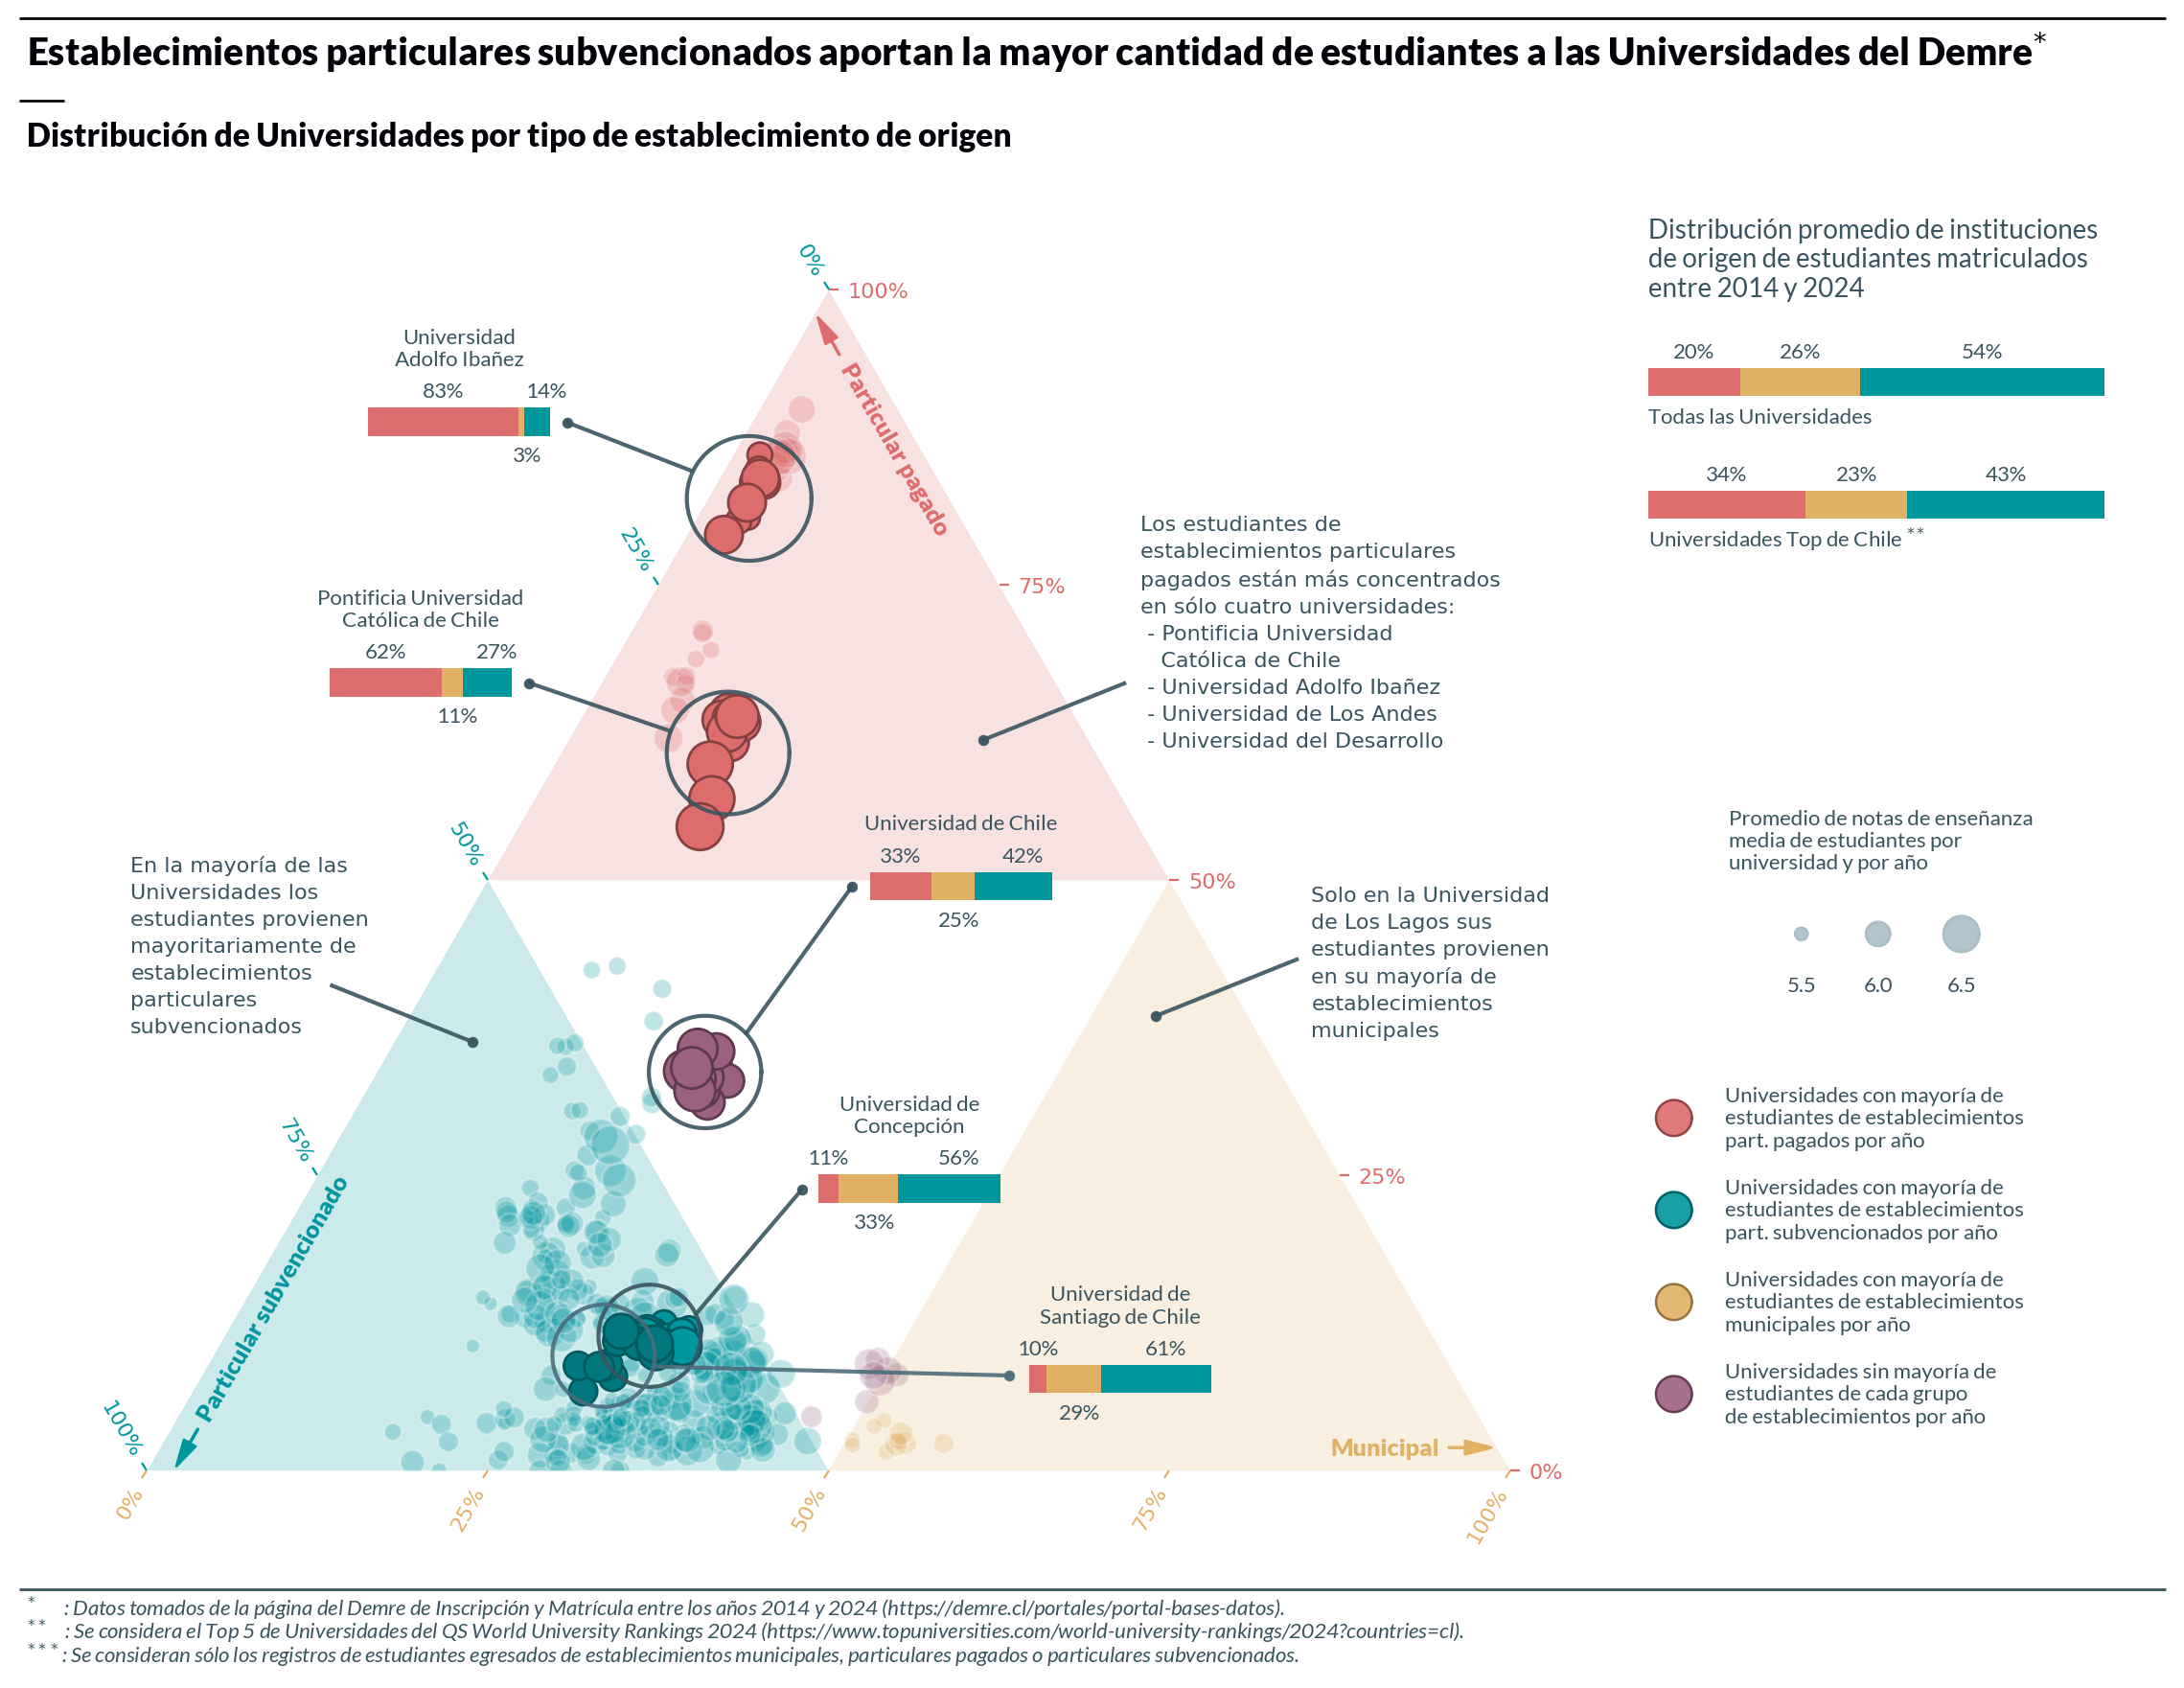

In [8]:
fig, ax = plt.subplots(1,figsize=(10,8), dpi=200)
draw_fig1_colors(fig, ax, df_admision_matricula, colorGen_1, colorPP_1, colorMun_1, colorPS_1, colorBlack, colorGrayText, colorGray)

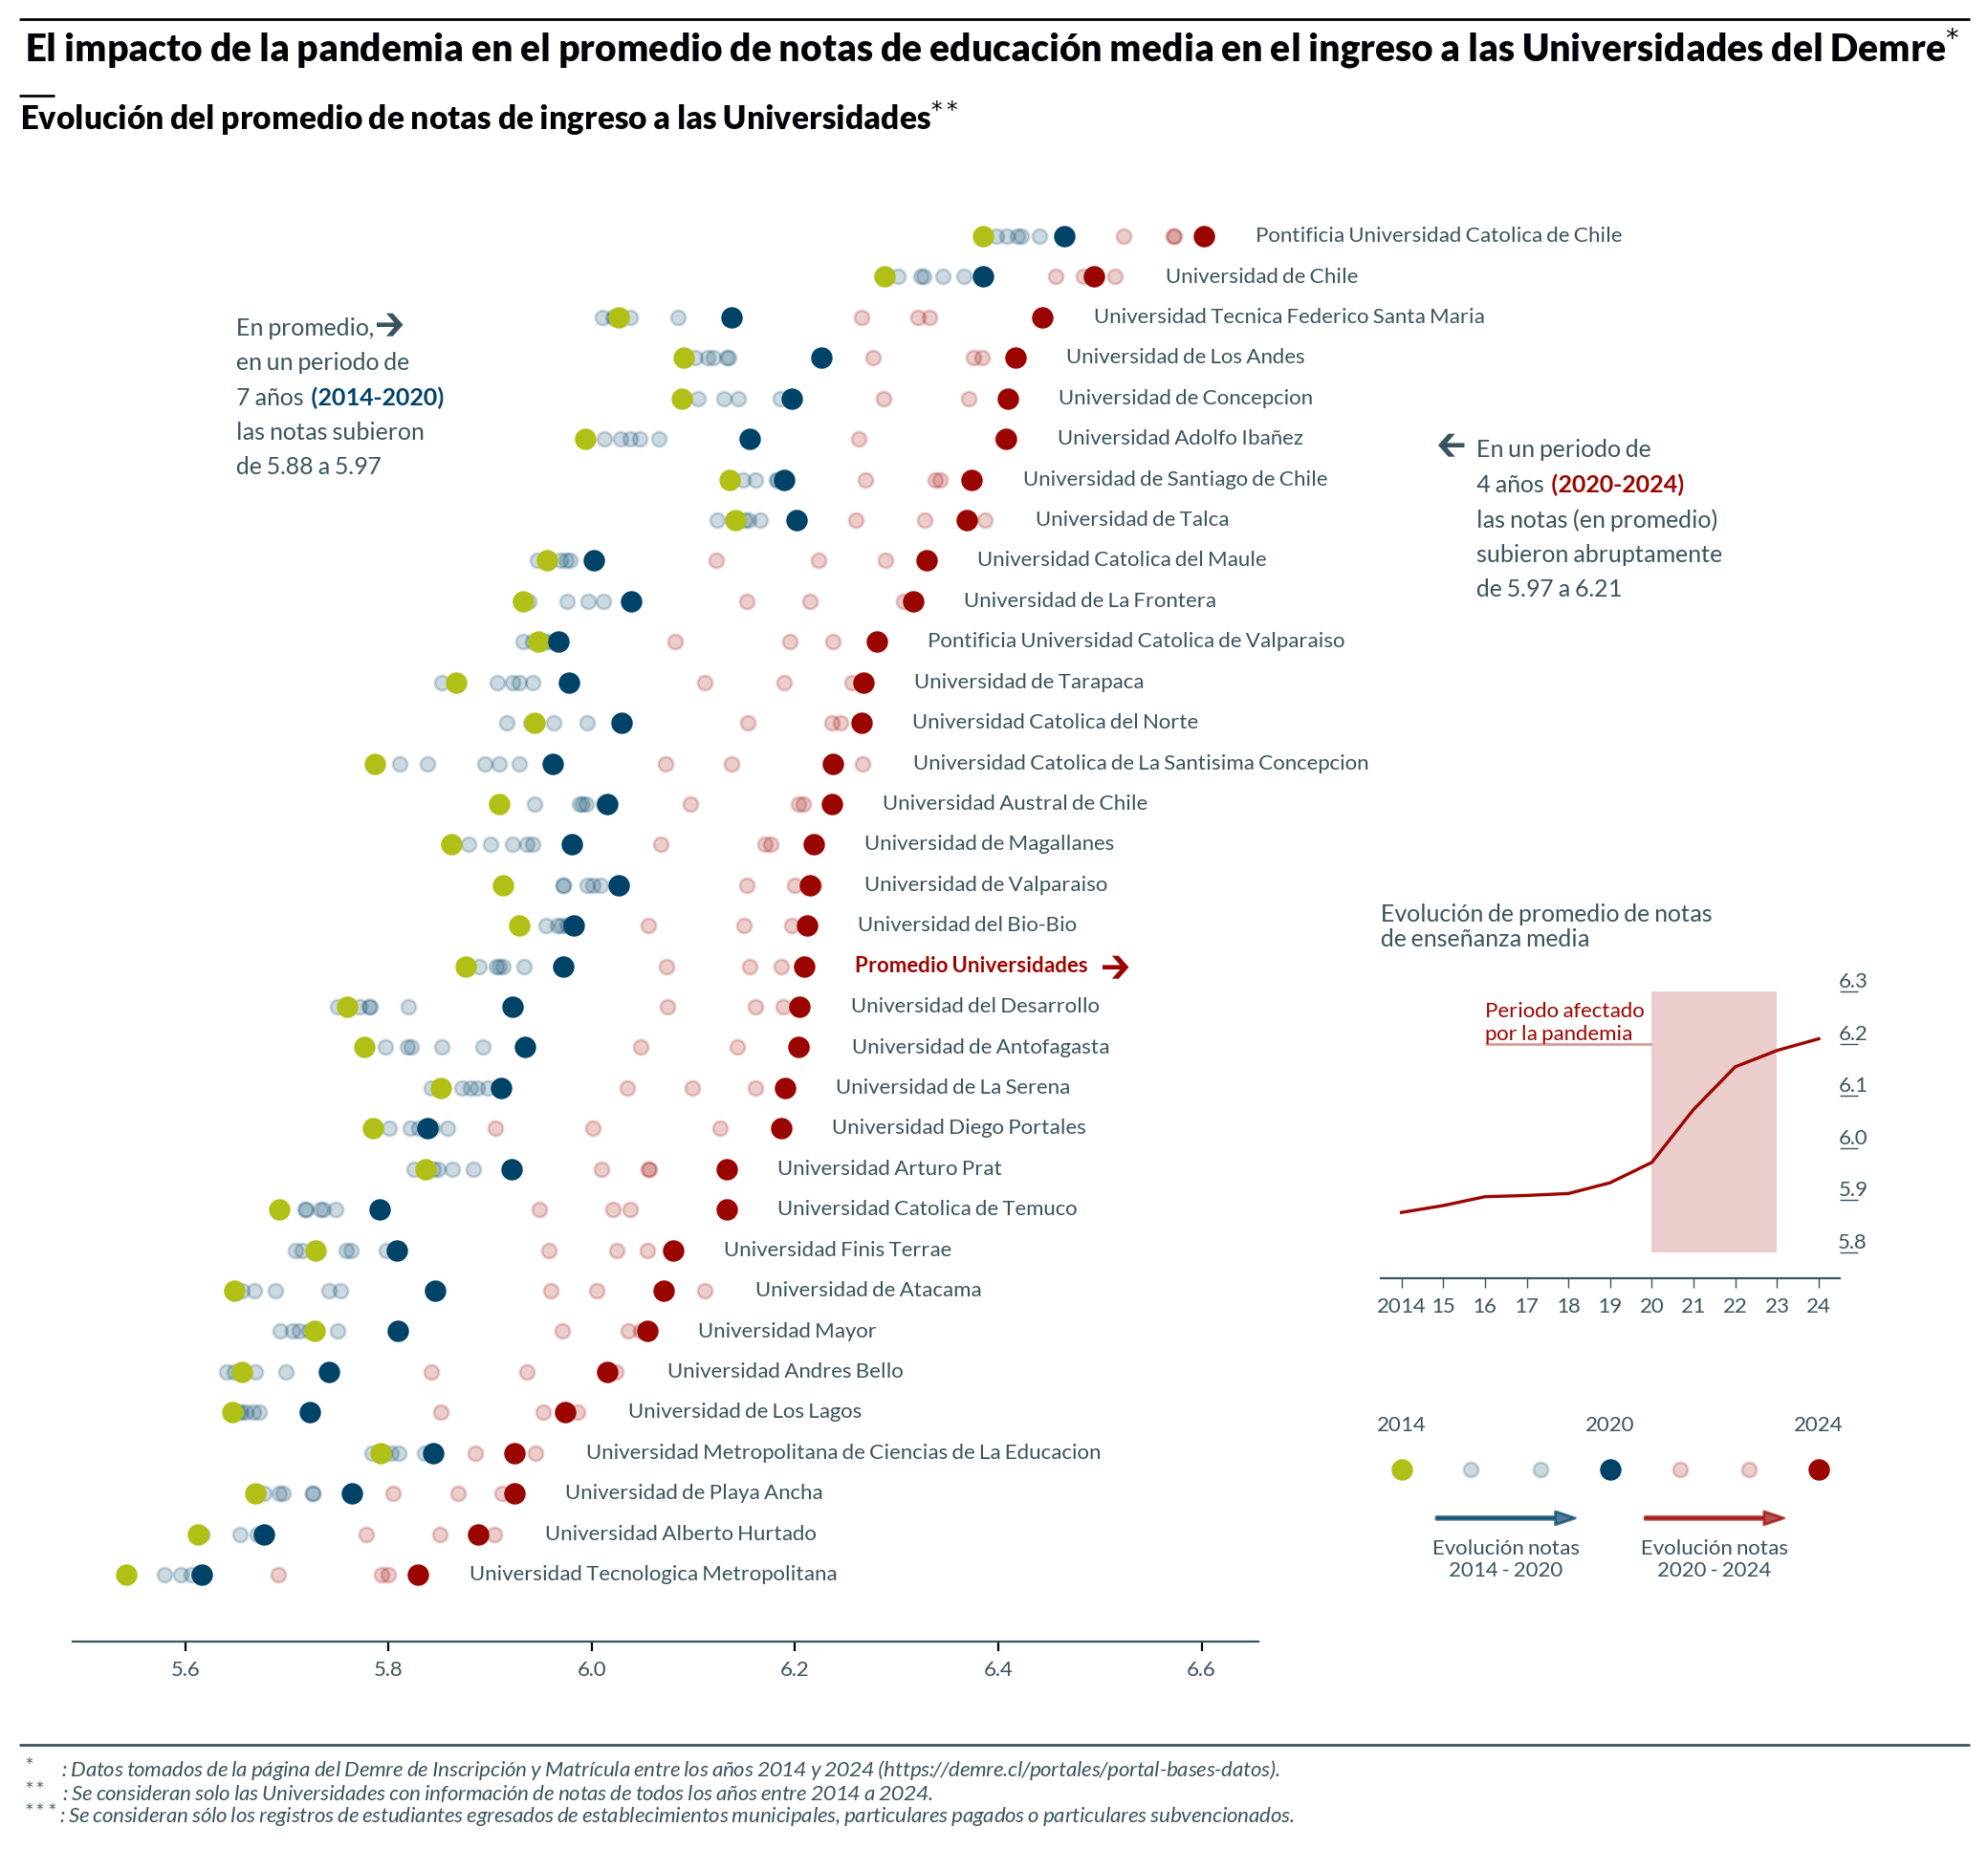

In [20]:
fig, ax = plt.subplots(1, figsize=(8,10), dpi=200)
draw_fig2_colors(fig, ax, df_admision_matricula, gradient_blue=gradient_blue, gradient_red=gradient_red, gradient_green=gradient_green, año_th=2020)